In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv("ReadySoilDataset_Final.csv")
df = df1[df1['Region'].isin([2, 4, 5, 7])].reset_index(drop=True)
df.head(10)

,Region,Year,Month,SoilTemperature-10,SoilTemperature-30,SoilTemperature-50,Rainfall,Temperature,Min Temperature,Max Temperature,Humidity,Sunshine,Wind Speed,Surface Pressure,Solar Radiation
0,2,2001,1,17.40,18.81,19.43,0.0,18.38,13.04,25.44,62.68,7.94,2.17,101268.29,199.25
1,2,2001,2,19.88,19.98,20.36,1.0,22.61,16.90,28.56,61.71,7.19,1.98,101039.08,210.73
2,2,2001,3,24.08,23.32,23.17,33.0,26.62,20.73,31.84,55.48,8.75,2.10,100882.56,251.75
3,2,2001,4,27.62,27.02,26.77,46.0,29.06,24.71,32.06,65.63,8.55,2.70,100655.40,257.46
4,2,2001,5,28.54,28.29,28.21,402.0,27.69,24.18,32.09,77.39,6.10,2.37,100234.63,172.32
5,2,2001,6,30.11,29.82,29.64,386.0,28.03,25.55,31.75,83.17,3.51,3.64,99934.18,140.45
6,2,2001,7,30.74,30.53,30.64,202.0,28.83,25.92,31.60,80.26,4.55,3.87,99991.05,169.40
7,2,2001,8,30.99,30.99,30.86,205.0,29.46,25.23,31.50,82.19,5.15,3.01,100129.68,181.66
8,2,2001,9,29.83,29.89,29.95,209.0,28.71,24.34,32.42,82.53,4.65,2.14,100499.17,170.22
9,2,2001,10,28.00,28.29,28.50,177.0,27.63,22.83,31.44,80.45,5.60,1.59,100864.38,167.89


In [20]:
features = df[[ 'Year', 'Month', 'Temperature', 'Min Temperature',
                'Max Temperature', 'Wind Speed','Sunshine',
                'Solar Radiation','Humidity']]
target = df['SoilTemperature-10']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42
)


model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Linear for regression
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-5, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Predict
y_pred = model.predict(X_test).flatten()

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n🔍 Improved MLP Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Epoch 1/300
22/22 [==============================] - 3s 16ms/step - loss: 713.9163 - val_loss: 687.1255 - lr: 0.0010
Epoch 2/300
22/22 [==============================] - 0s 7ms/step - loss: 488.7769 - val_loss: 559.9075 - lr: 0.0010
Epoch 3/300
22/22 [==============================] - 0s 7ms/step - loss: 256.8778 - val_loss: 363.0542 - lr: 0.0010
Epoch 4/300
22/22 [==============================] - 0s 7ms/step - loss: 94.5885 - val_loss: 192.7680 - lr: 0.0010
Epoch 5/300
22/22 [==============================] - 0s 7ms/step - loss: 38.2821 - val_loss: 102.1007 - lr: 0.0010
Epoch 6/300
22/22 [==============================] - 0s 7ms/step - loss: 18.9822 - val_loss: 61.8141 - lr: 0.0010
Epoch 7/300
22/22 [==============================] - 0s 7ms/step - loss: 15.9658 - val_loss: 37.8252 - lr: 0.0010
Epoch 8/300
22/22 [==============================] - 0s 7ms/step - loss: 15.5175 - val_loss: 23.3003 - lr: 0.0010
Epoch 9/300
22/22 [==============================] - 0s 7ms/step - loss: 16.065

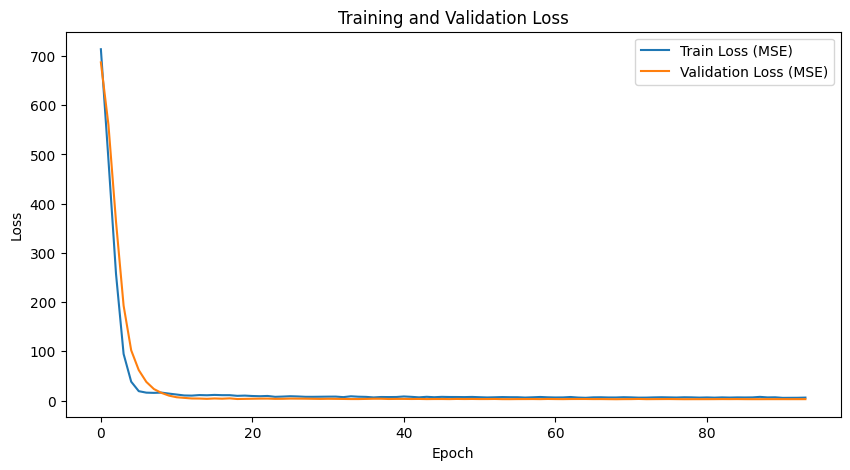

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

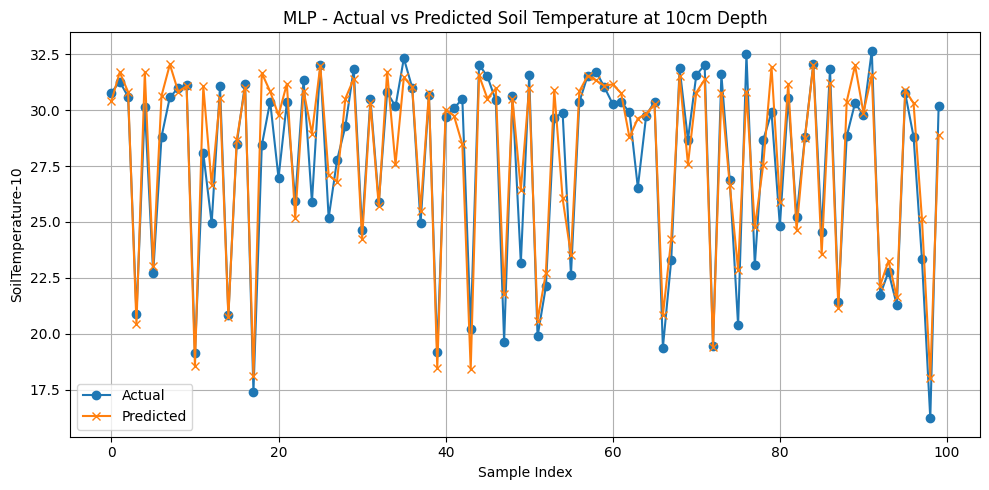

In [21]:

# Plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('MLP - Actual vs Predicted Soil Temperature at 10cm Depth')
plt.xlabel('Sample Index')
plt.ylabel('SoilTemperature-10')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()